In [ ]:
import tensorflow as tf 
from tensorflow.keras.layers import *

In [ ]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp  "/content/drive/MyDrive/datasetzip.zip" "/content/dataset.zip"

In [ ]:
!unzip '/content/dataset.zip'

Archive:  /content/dataset.zip
replace content/content/dataset/train/masks/51_751,2_1743_4.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: content/content/dataset/train/masks/51_751,2_1743_4.png  
  inflating: content/content/dataset/train/masks/55_526,5_0506_4.png  
  inflating: content/content/dataset/train/masks/52_351,3_2041_2.png  
  inflating: content/content/dataset/train/masks/56_442,2_2855_2.png  
  inflating: content/content/dataset/train/masks/71_103,22_728_4.png  
  inflating: content/content/dataset/train/masks/44_424,13_103_6.png  
  inflating: content/content/dataset/train/masks/33_540,14_508_3.png  
  inflating: content/content/dataset/train/masks/38_690,11_816_4.png  
  inflating: content/content/dataset/train/masks/40_026,18_753_3.png  
  inflating: content/content/dataset/train/masks/38_003,4_2111_1.png  
  inflating: content/content/dataset/train/masks/43_157,8_6386_2.png  
  inflating: content/content/dataset/train/masks/69_406,33_683_3.png  
  inflating:

In [ ]:
drive.flush_and_unmount()

In [ ]:
! pip install git+https://github.com/divamgupta/image-segmentation-keras

  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-qy1cmcoy
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-qy1cmcoy
     |████████████████████████████████| 3.3MB 17.2MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-cp36-none-any.whl size=30543 sha256=36d5586d68f7a3032be3b578bff485baa0b7ae68d2059228d2b34570d412b61d
  Stored in directory: /tmp/pip-ephem-wheel-cache-c7aq6c29/wheels/a8/be/2c/1e1f0a75330e3ae33dd34c2ba085929eb7c7ae1d2184f4b7b5
Successfully built keras-segmentation
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1


In [ ]:
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=5 ,  input_height=640,input_width=1248  ) 


58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
model.train(
    train_images =  "/content/content/content/dataset/train/frames",
    train_annotations = "/content/content/content/dataset/train/masks",
    checkpoints_path = "/tmp/vgg_unet_1" , epochs=1  
)

  0%|          | 5/1002 [00:00<00:22, 43.53it/s]

Verifying training dataset


100%|██████████| 1002/1002 [00:18<00:00, 54.37it/s]

Dataset verified! 
Instructions for updating:
Please use Model.fit, which supports generators.


512/512 [==============================] - 340s 664ms/step - loss: 0.4461 - accuracy: 0.8669


In [ ]:
 out = model.predict_segmentation(
    inp="/content/content/content/dataset/test/images/36_645,16_956_10.jpg",
    out_fname="/tmp/out.png"
)

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

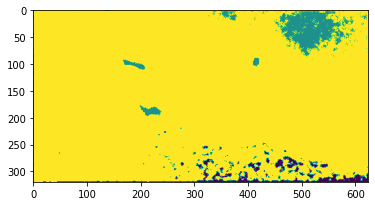

In [ ]:
plt.imshow(out)

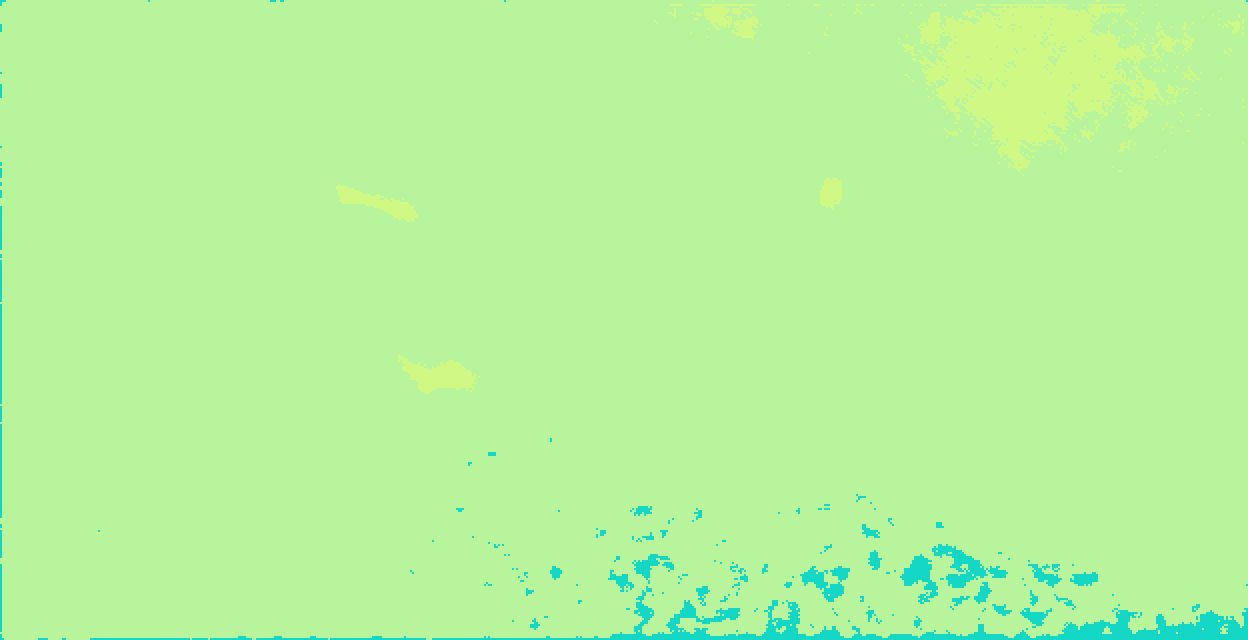

In [ ]:
from IPython.display import Image
Image('/tmp/out.png')

In [ ]:
o = model.predict_segmentation(
    inp='/content/content/content/dataset/test/images/36_645,16_956_10.jpg',
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,

    class_names = [ "Sea Surface",  "Oil Spill", "Look-alike","Ship","Land"]

)

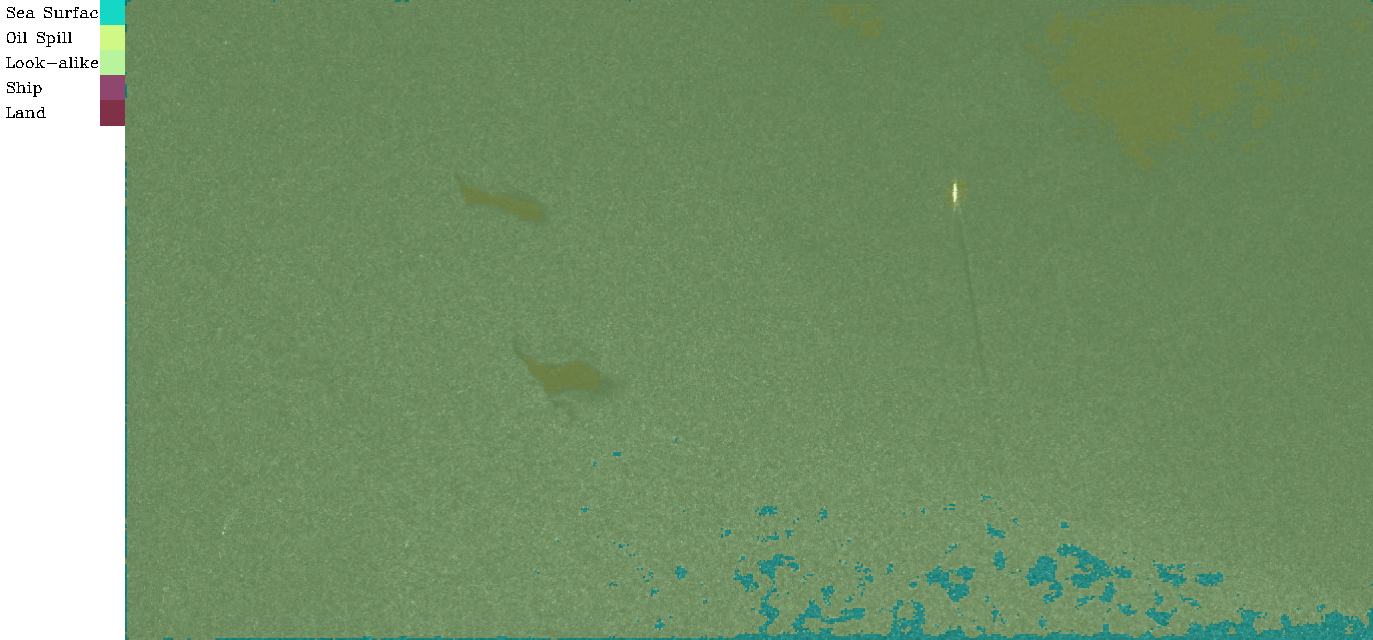

In [ ]:
from IPython.display import Image
Image('/tmp/out.png')

In [ ]:
def predict_classes(filename):
    o = model.predict_segmentation(
        inp=filename,
        out_fname="/tmp/out.png" , overlay_img=False, show_legends=True,

        class_names = [ "Sea Surface",  "Oil Spill", "Look-alike","Ship","Land"]
    )
    

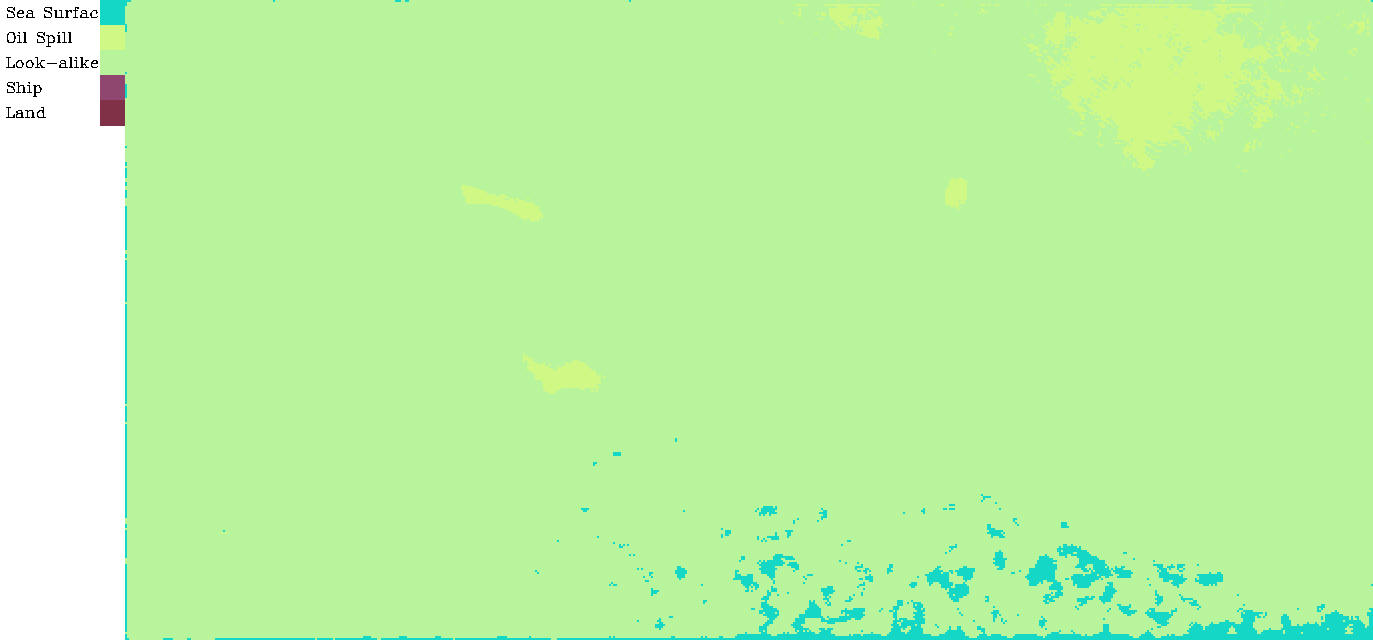

In [ ]:
predict_classes('/content/content/content/dataset/test/images/36_645,16_956_10.jpg')
Image('/tmp/out.png')

In [ ]:
model.save('Oil-Spill-v1.h5')
# jsonconfig = model.to_json()


In [ ]:
tf.keras.models.save_model(
    model, filepath, overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None, save_traces=True
)

In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('/content/Oil-Spill-v1.h5')

In [ ]:
 out = model.predict("/content/content/content/dataset/test/images/36_645,16_956_10.jpg")

In [ ]:
import cv2
import numpy
img = cv2.imread('/content/content/content/dataset/test/labels/35_800,15_180_2.png')
x = numpy.unique(img.reshape(-1, img.shape[2]), axis=0)
print(x)

[[0 0 0]
 [1 1 1]
 [3 3 3]]
